# Import Libraries Used

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Utilities.plot import histvstarget, distribution
from IPython.core.display import display, HTML
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from datetime import datetime, date
import math
import os
import cv2
import glob
import scipy.stats as st
import scipy.io as spio
import sklearn.preprocessing as skpp
import scipy.sparse.linalg as ll
from skimage.measure import block_reduce
from os.path import relpath, exists
import seaborn as sns
from PIL import Image
import time
from datetime import timedelta
from scipy.spatial.distance import cdist 
import networkx as nx
#from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.utils.graph_shortest_path import graph_shortest_path
import sklearn.utils.graph_shortest_path as gspath
from sklearn.metrics.pairwise import pairwise_distances
import plotly.express as px
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import graphviz
import pydotplus
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import pydotplus
from IPython.display import Image  

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

# Import and preprocess the data

Remember from the data exploration notebook that we now have three different data sets now, the original, one with PCA and one with attribute selection using BFE.

First lets take 10% of the data out to be used as a validation set and create the three different training-sets from the rest.

In [2]:
train_data = pd.read_csv('input/Train.csv')
cols = train_data.columns
#train_data = train_data.dropna(axis=0)
train_data = train_data.fillna(train_data.mean())
train_data
Y = train_data['Outcome']
X = train_data.drop(['Outcome'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [3]:
mean_x_train = np.mean(x_train)
std_x_train = np.std(x_train)
std = lambda x: ((x - mean_x_train)/std_x_train)
inv_std = lambda x: ((x*std_x_train + mean_x_train))
x_train_std = std(x_train)
x_test_std = std(x_test)

In [4]:
trainingdata = pd.DataFrame(np.hstack((x_train_std, y_train[:,np.newaxis])), columns = cols)
validationdata = pd.DataFrame(np.hstack((x_test_std, y_test[:,np.newaxis])), columns = cols)
trainingdata.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.193734  0.651919      -0.573318      -0.029343  0.021280  0.308324   
1    -0.845116  1.456855       1.233004      -0.049550  0.021280  0.322695   
2    -0.845116 -0.474992      -1.065951       1.895660  0.268393  0.394554   
3    -0.845116 -0.120820      -1.558585      -1.880335 -1.232557 -1.502511   
4    -0.262588  1.617842       0.411948       1.094691  0.350477  0.150235   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -1.063375  0.630527      1.0  
1                  1.181396  1.562256      1.0  
2                 -0.236049 -0.809417      0.0  
3                 -0.843526 -0.809417      0.0  
4                  1.369425 -0.216498      1.0

In [5]:
# Dataset with PCA
import Utilities.mypca as PCA
pca = PCA.MyPCA()
pca.fit(x_train)
PCA_x_train = pca.fit_transform(5, x_train)
PCA_x_val = pca.fit_transform(5, x_test)
print(PCA_x_train.shape)

(518, 5)


In [6]:
x = trainingdata[["Glucose", "Pregnancies", "BMI", "SkinThickness", "Insulin", "BloodPressure","DiabetesPedigreeFunction","Age"]]
y = trainingdata[['Outcome']]
print(x.shape)

(518, 8)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lm = LinearRegression()
model_1=lm.fit(x_train, y_train)


In [8]:
pd.DataFrame(model_1.coef_.T,x.columns,columns=['Coefficient'])

Coefficient
Glucose                      0.022368
Pregnancies                  0.006319
BMI                         -0.002885
SkinThickness               -0.000188
Insulin                     -0.000244
BloodPressure                0.015765
DiabetesPedigreeFunction     0.163283
Age                          0.000731

<AxesSubplot:xlabel='Outcome'>

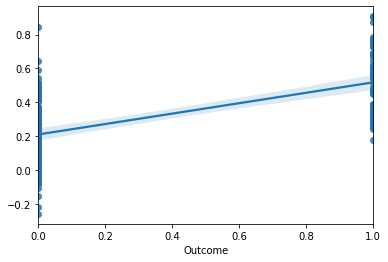

In [9]:
predictions_1 = model_1.predict(x_test)
sns.regplot(y_test,predictions_1)

In [10]:
model_1.score(x_train, y_train)

0.30768985461980203

In [11]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
ls = sm.OLS(y_train,x_train_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     28.28
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.91e-36
Time:                        18:32:36   Log-Likelihood:                -258.04
No. Observations:                 518   AIC:                             534.1
Df Residuals:                     509   BIC:                             572.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [12]:
print("Mean squared error: %.2f" % np.mean((model_1.predict(x_test) - y_test) ** 2))

Mean squared error: 0.15


In [13]:
#Logistic Regression

In [14]:
lm_logistic = LogisticRegression(random_state=0,max_iter=200)

In [15]:
model_logistic = lm_logistic.fit(x_train, y_train.values.ravel())

In [16]:
model_logistic

LogisticRegression(max_iter=200, random_state=0)

In [17]:
model_logistic.score(x_test, y_test)

0.791907514450867

In [18]:
pred_proba_df = pd.DataFrame(model_logistic.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = np.array(pred_proba_df.iloc[:,1].apply(lambda x: 1 if x>i else 0))
    test_accuracy = metrics.accuracy_score(np.array(y_test), y_test_pred)
    print('Our testing accuracy is {}'.format(test_accuracy))


******** For i = 0.05 ******
Our testing accuracy is 0.4277456647398844

******** For i = 0.1 ******
Our testing accuracy is 0.5838150289017341

******** For i = 0.15 ******
Our testing accuracy is 0.6589595375722543

******** For i = 0.2 ******
Our testing accuracy is 0.6994219653179191

******** For i = 0.25 ******
Our testing accuracy is 0.7052023121387283

******** For i = 0.3 ******
Our testing accuracy is 0.7630057803468208

******** For i = 0.35 ******
Our testing accuracy is 0.7630057803468208

******** For i = 0.4 ******
Our testing accuracy is 0.7630057803468208

******** For i = 0.45 ******
Our testing accuracy is 0.791907514450867

******** For i = 0.5 ******
Our testing accuracy is 0.791907514450867

******** For i = 0.55 ******
Our testing accuracy is 0.791907514450867

******** For i = 0.6 ******
Our testing accuracy is 0.7861271676300579

******** For i = 0.65 ******
Our testing accuracy is 0.7687861271676301

******** For i = 0.7 ******
Our testing accuracy is 0.73988

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import math
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from skmultilearn.adapt import MLkNN

Using TensorFlow backend.


In [20]:
#Deep learning model

model_11 = Sequential()
model_11.add(Dense(12, input_dim=8, activation='relu'))
model_11.add(Dense(10, activation='relu'))
model_11.add(Dense(1, activation='sigmoid'))

model_11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model_11.fit(x_train, y_train, epochs=30, batch_size=10)
# evaluate the keras model
_, accuracy = model_11.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
518/518 [==============================] - 0s 512us/step - loss: 4.2008 - accuracy: 0.6081
Epoch 2/30
518/518 [==============================] - 0s 143us/step - loss: 2.0197 - accuracy: 0.6371
Epoch 3/30
518/518 [==============================] - 0s 148us/step - loss: 1.5269 - accuracy: 0.6293
Epoch 4/30
518/518 [==============================] - 0s 137us/step - loss: 1.3457 - accuracy: 0.6409
Epoch 5/30
518/518 [==============================] - 0s 137us/step - loss: 1.1912 - accuracy: 0.6506
Epoch 6/30
518/518 [==============================] - 0s 119us/step - loss: 1.1534 - accuracy: 0.6467
Epoch 7/30
518/518 [==============================] - 0s 124us/step - loss: 1.0668 - accuracy: 0.6737
Epoch 8/30
518/518 [==============================] - 0s 125us/step - loss: 0.8462 - accuracy: 0.6564
Epoch 9/30
518/518 [==============================] - 0s 124us/step - loss: 0.7314 - accuracy: 0.6467
Epoch 10/30
518/518 [==============================] - 0s 138us/step - loss: 0.685

In [21]:
#Accuracy Prediction
model_11.predict(x_test)
prediction_11= model_11.predict(x_test)
prediction_11[prediction_11 < 0.1] = 0
prediction_11[prediction_11 >= 0.1] = 1

metrics.accuracy_score(prediction_11,y_test)

0.4046242774566474

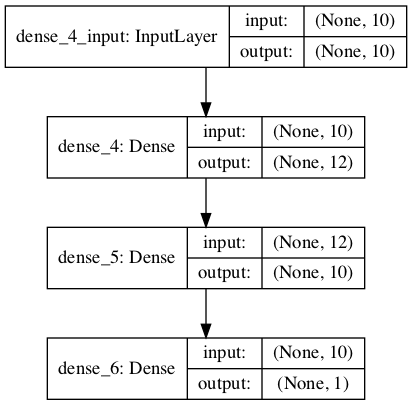

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model_p = Sequential()
model_p.add(Dense(12, input_dim=10, activation='relu'))
model_p.add(Dense(10, activation='relu'))
model_p.add(Dense(1, activation='sigmoid'))
plot_model(model_p, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

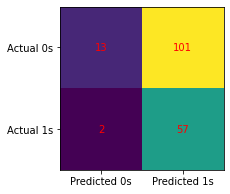

In [23]:
cm = metrics.confusion_matrix(y_test,prediction_11) 
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [24]:
#Decision Tree Classifier

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree


In [26]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X,Y)
print(dt_clf)

DecisionTreeClassifier()


In [27]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

DecisionTreeClassifier()

[Text(164.59024658203126, 211.04470588235293, 'X[1] <= 127.5\ngini = 0.456\nsamples = 691\nvalue = [448, 243]'),
 Text(78.2439697265625, 198.25411764705882, 'X[7] <= 28.5\ngini = 0.313\nsamples = 432\nvalue = [348, 84]'),
 Text(40.62392578125, 185.4635294117647, 'X[5] <= 45.4\ngini = 0.166\nsamples = 241\nvalue = [219, 22]'),
 Text(27.9544921875, 172.6729411764706, 'X[5] <= 30.95\ngini = 0.147\nsamples = 237\nvalue = [218, 19]'),
 Text(10.4625, 159.88235294117646, 'X[0] <= 7.0\ngini = 0.031\nsamples = 129\nvalue = [127, 2]'),
 Text(7.846875000000001, 147.09176470588235, 'X[4] <= 48.5\ngini = 0.016\nsamples = 128\nvalue = [127, 1]'),
 Text(5.23125, 134.30117647058825, 'X[4] <= 47.0\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(2.615625, 121.51058823529411, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(7.846875000000001, 121.51058823529411, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.4625, 134.30117647058825, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]'),
 Text(13

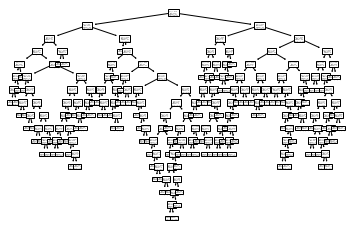

In [28]:
tree.plot_tree(dt_clf) 

In [29]:
_data = tree.export_graphviz(dt_clf, out_file="None", filled=True, rounded=True,special_characters=True)

In [30]:
import graphviz 
from graphviz import Source
_data = tree.export_graphviz(dt_clf, out_file=None)
graph = graphviz.Source(_data) 
graph.render("name of file",view = True)
import pydotplus
from IPython.display import Image 

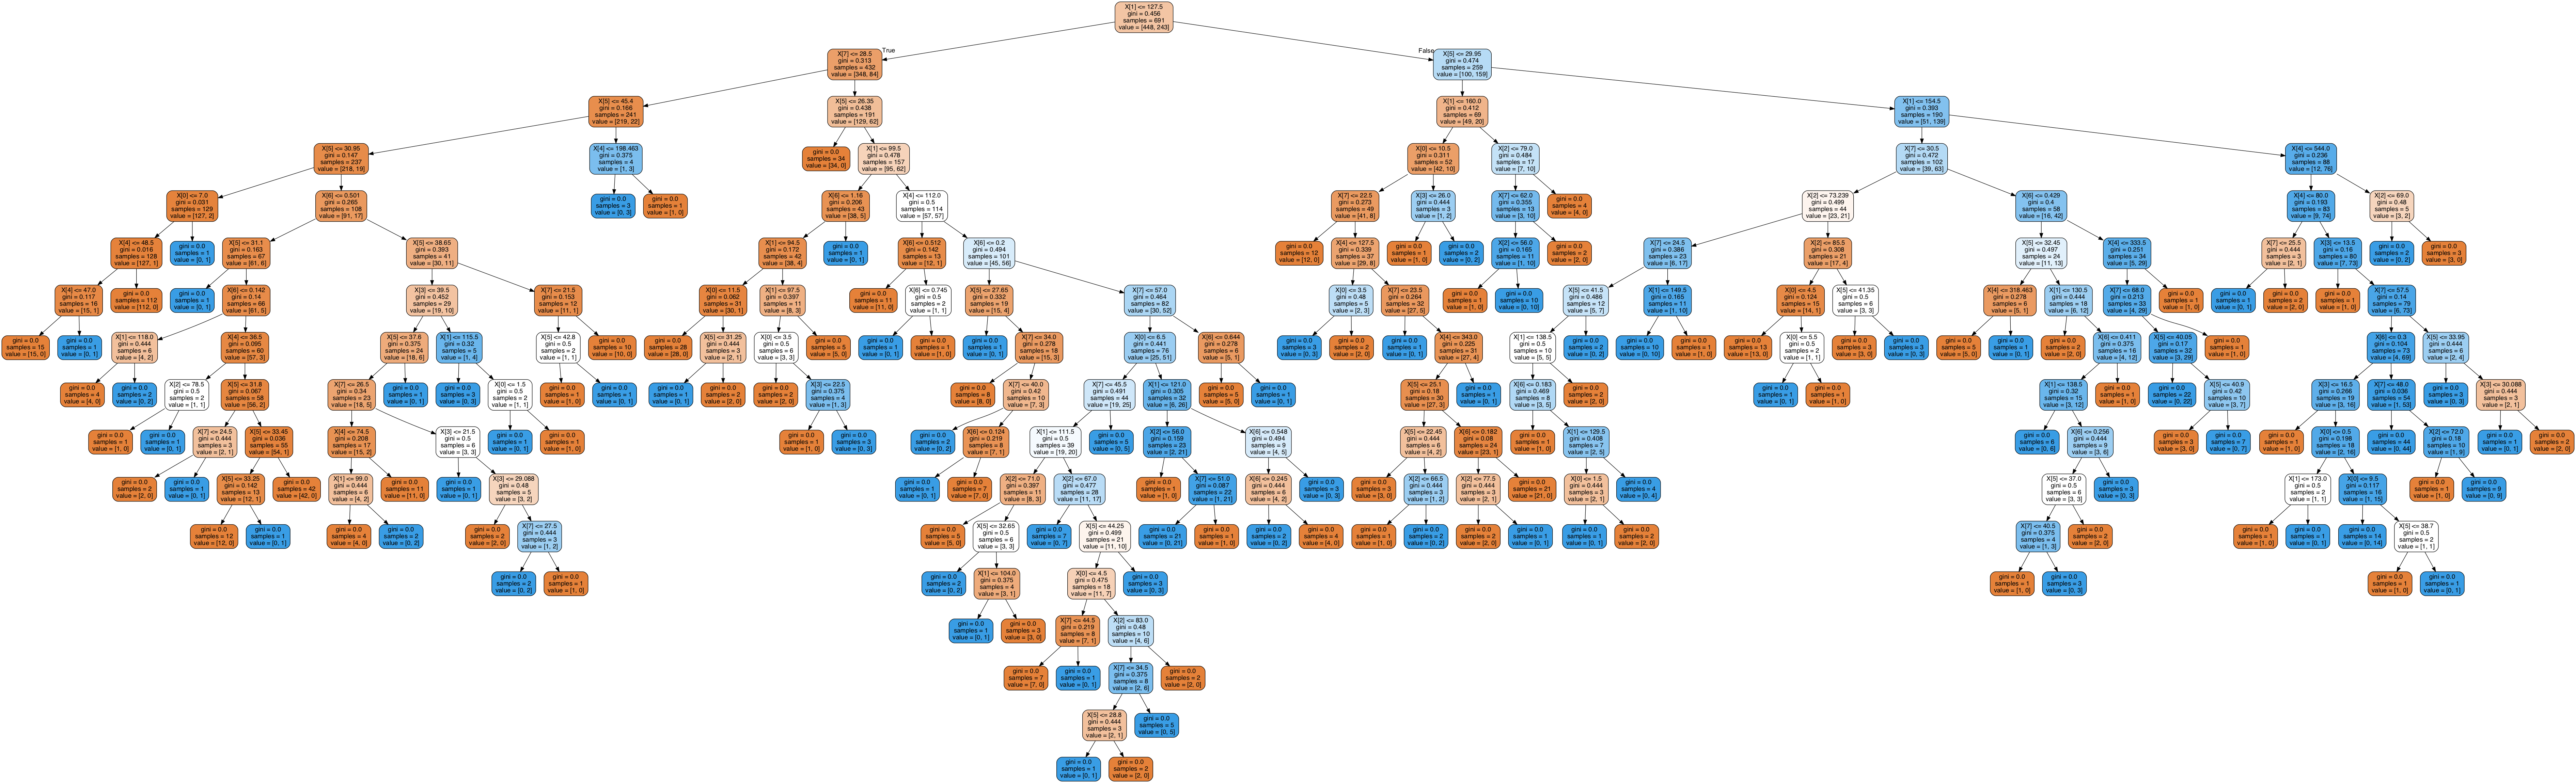

In [31]:
import pydotplus
_data = tree.export_graphviz(dt_clf, out_file=None, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(_data)  

Image(graph.create_png())

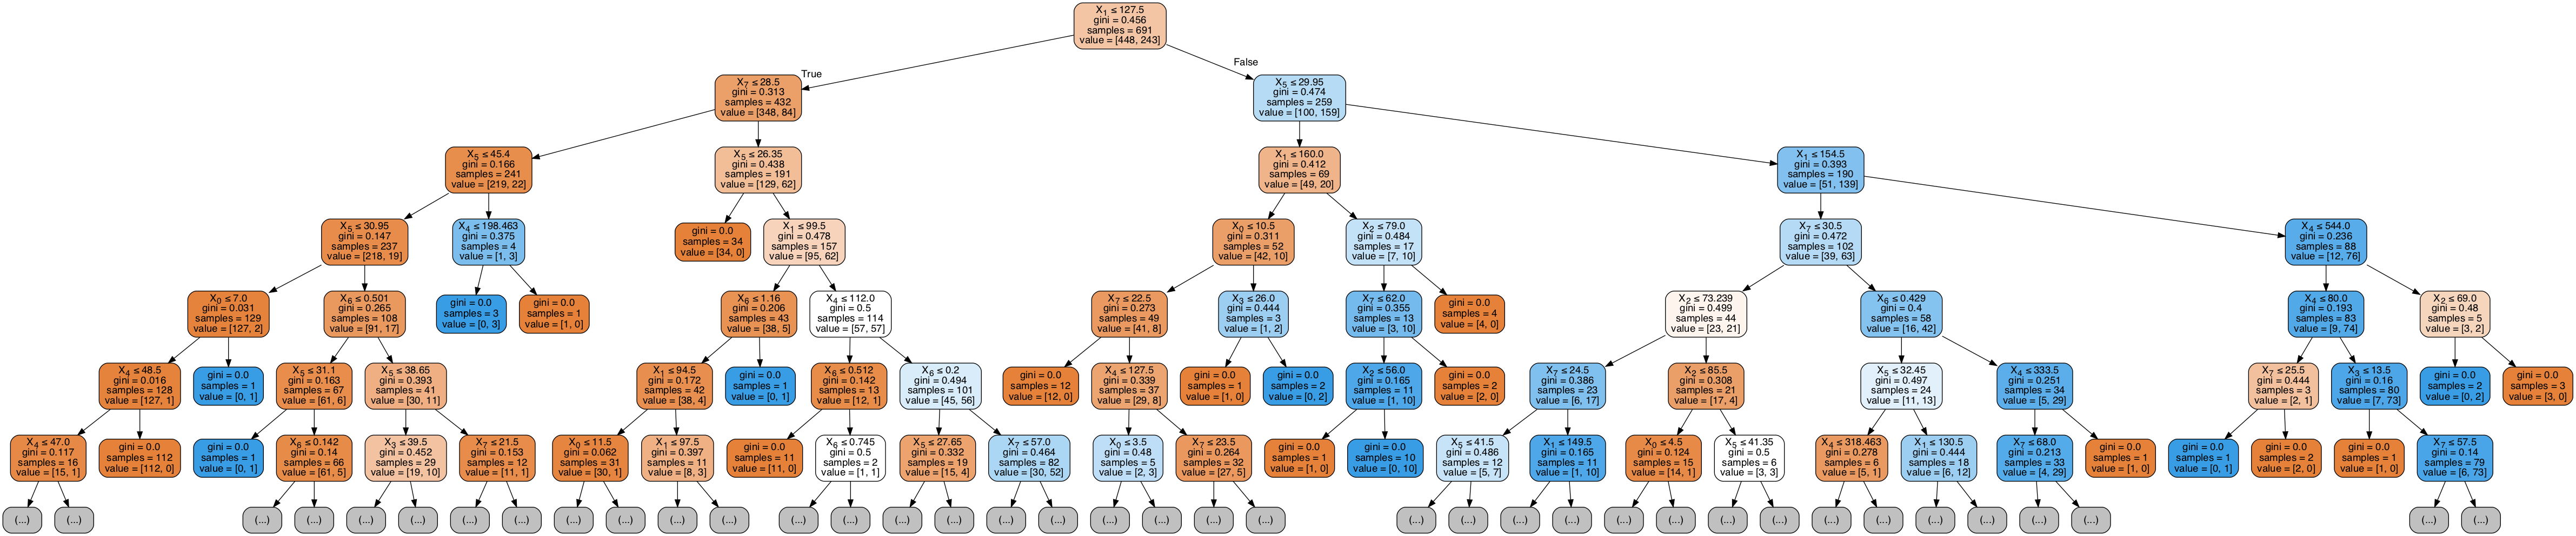

In [32]:
import pydotplus
_data = tree.export_graphviz(dt_clf, out_file=None, filled=True, rounded=True,
                special_characters=True, max_depth=6)

graph = pydotplus.graph_from_dot_data(_data)  


Image(graph.create_png())

>1, train: 0.737, test: 0.719
>2, train: 0.775, test: 0.777
>3, train: 0.781, test: 0.777
>4, train: 0.790, test: 0.784
>5, train: 0.844, test: 0.755
>6, train: 0.866, test: 0.748
>7, train: 0.886, test: 0.727
>8, train: 0.917, test: 0.676
>9, train: 0.946, test: 0.705
>10, train: 0.958, test: 0.712
>11, train: 0.975, test: 0.712
>12, train: 0.980, test: 0.734
>13, train: 0.989, test: 0.705
>14, train: 0.993, test: 0.698
>15, train: 0.996, test: 0.719
>16, train: 1.000, test: 0.698
>17, train: 1.000, test: 0.691
>18, train: 1.000, test: 0.676
>19, train: 1.000, test: 0.727
>20, train: 1.000, test: 0.727


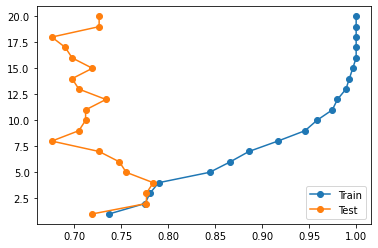

In [33]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(train_scores, values, '-o', label='Train')
pyplot.plot(test_scores, values, '-o', label='Test')
pyplot.legend()
pyplot.show()

[Text(610.3125, 733.86, 'X[1] <= 127.5\nentropy = 0.936\nsamples = 691\nvalue = [448, 243]'),
 Text(313.875, 570.78, 'X[5] <= 26.45\nentropy = 0.711\nsamples = 432\nvalue = [348, 84]'),
 Text(139.5, 407.70000000000005, 'X[6] <= 0.341\nentropy = 0.075\nsamples = 110\nvalue = [109, 1]'),
 Text(69.75, 244.62, 'entropy = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(209.25, 244.62, 'entropy = 0.141\nsamples = 50\nvalue = [49, 1]'),
 Text(488.25, 407.70000000000005, 'X[7] <= 28.5\nentropy = 0.823\nsamples = 322\nvalue = [239, 83]'),
 Text(348.75, 244.62, 'X[3] <= 29.088\nentropy = 0.55\nsamples = 165\nvalue = [144, 21]'),
 Text(279.0, 81.54000000000008, 'entropy = 0.177\nsamples = 75\nvalue = [73, 2]'),
 Text(418.5, 81.54000000000008, 'entropy = 0.744\nsamples = 90\nvalue = [71, 19]'),
 Text(627.75, 244.62, 'X[1] <= 100.5\nentropy = 0.968\nsamples = 157\nvalue = [95, 62]'),
 Text(558.0, 81.54000000000008, 'entropy = 0.634\nsamples = 50\nvalue = [42, 8]'),
 Text(697.5, 81.54000000000008, 'entr

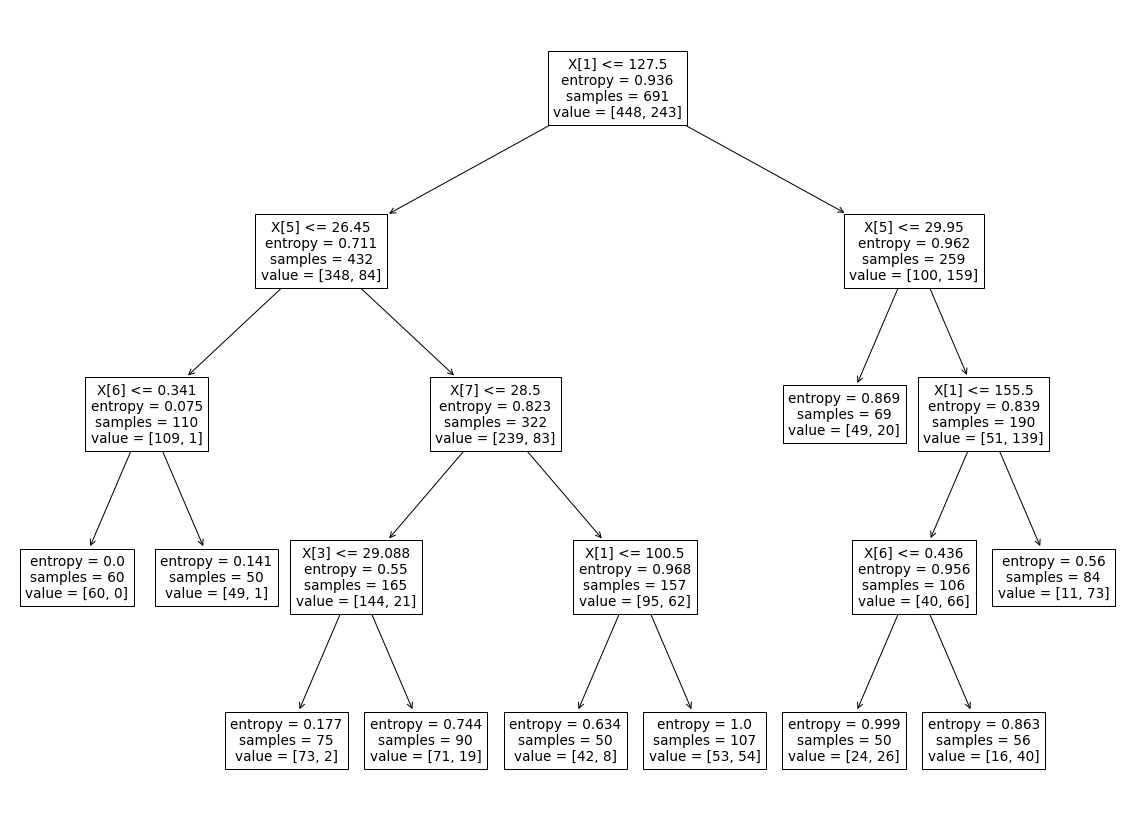

In [34]:
#CART Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50)
DecisionTree.fit(X,Y)
plt.figure(figsize=(20,15))
plot_tree(DecisionTree)

In [35]:
DecisionTree.fit(X_train, Y_train)
Ypred=DecisionTree.predict(X_test)
missclf_rate= 1-metrics.accuracy_score(Y_test, Ypred)
missclf_rate

0.2230215827338129

In [36]:
#random forest model
ntrees=[]
miss_clf_rate=[]
for i in range (1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, Y_train)
    Ypred_dt=rf.predict(X_test)
    ntrees.append(i)
    rate=1-metrics.accuracy_score(Y_test, Ypred)
    miss_clf_rate.append(rate)

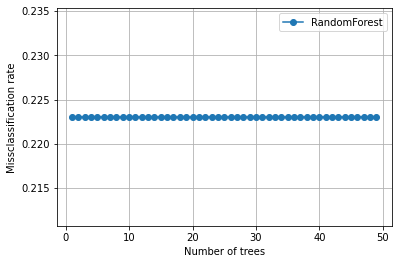

In [37]:
plt.figure()#(figsize=(20,10))
plt.plot(ntrees, miss_clf_rate, '-o', label='RandomForest')
plt.xlabel('Number of trees')
plt.ylabel('Missclassification rate')
plt.legend()
plt.grid()

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X,Y)
rf_ypred= rf_clf.predict(X_test)
rf_auc=roc_auc_score(Y_test, rf_ypred)
rf_auc

1.0

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [40]:
dt1_clf = DecisionTreeClassifier()
dt1_clf=dt1_clf.fit(X_train, Y_train)
dt_ypred= dt1_clf.predict(X_test)
dt_auc=roc_auc_score(Y_test, dt_ypred)
dt_auc

0.6861631016042781

In [41]:
#Misclassification rate plot DecisionTree and RandomForest
dt_auc=[]
rf_auc=[]
rate_dt_auc=[]
rate_rf_auc=[]
for i in range (1,100):
    dt = DecisionTreeClassifier(max_depth=i)
    rf = RandomForestClassifier(max_depth=i)
    dt.fit(X_train, Y_train)
    rf.fit(X_train, Y_train)
    
    ypred_dt = dt.predict(X_test)
    rate_dt=1-metrics.accuracy_score(Y_test, ypred_dt)
    rate_dt
    auc_dt=roc_auc_score(Y_test, ypred_dt)
    dt_auc.append(auc_dt)
    rate_dt_auc.append(rate_dt)
    
    
    ypred_rf = rf.predict(X_test)
    rate_rf=1-metrics.accuracy_score(Y_test, ypred_rf)
    auc_rf=roc_auc_score(Y_test, ypred_rf)
    rf_auc.append(auc_rf)
    rate_rf_auc.append(rate_rf)

Text(0, 0.5, 'Misclassication error rate')

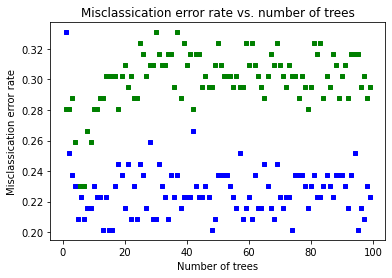

In [42]:
fig=plt.figure()
ax1=fig.add_subplot()
#ax1.scatter(range(1,100), dt_auc, s=12, c='g', marker="s", label='Decision Tree')
#ax1.scatter(range(1,100), rf_auc, s=12, c='b', marker="s", label='Random Forest')
ax1.scatter(range(1,100), rate_dt_auc, s=12, c='g', marker="s", label='Decision Tree')
ax1.scatter(range(1,100), rate_rf_auc, s=12, c='b', marker="s", label='Random Forest')
plt.title('Misclassication error rate vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Misclassication error rate')

>1, train: 0.707, test: 0.784
>2, train: 0.763, test: 0.799
>3, train: 0.764, test: 0.806
>4, train: 0.803, test: 0.698
>5, train: 0.841, test: 0.719
>6, train: 0.857, test: 0.770
>7, train: 0.895, test: 0.691
>8, train: 0.935, test: 0.705
>9, train: 0.962, test: 0.655
>10, train: 0.978, test: 0.712
>11, train: 0.986, test: 0.698
>12, train: 0.996, test: 0.683
>13, train: 0.998, test: 0.676
>14, train: 1.000, test: 0.691
>15, train: 1.000, test: 0.676
>16, train: 1.000, test: 0.683
>17, train: 1.000, test: 0.676
>18, train: 1.000, test: 0.669
>19, train: 1.000, test: 0.698
>20, train: 1.000, test: 0.698
>21, train: 1.000, test: 0.662
>22, train: 1.000, test: 0.698
>23, train: 1.000, test: 0.698
>24, train: 1.000, test: 0.676
>25, train: 1.000, test: 0.705
>26, train: 1.000, test: 0.719
>27, train: 1.000, test: 0.662
>28, train: 1.000, test: 0.698
>29, train: 1.000, test: 0.676
>30, train: 1.000, test: 0.683
>31, train: 1.000, test: 0.691
>32, train: 1.000, test: 0.691
>33, train: 1.000

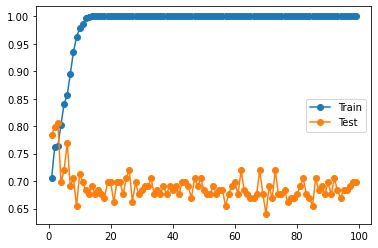

In [43]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 100)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

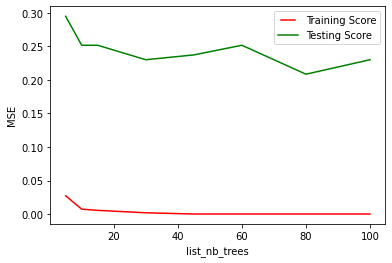

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(X_train, Y_train)

    train_results.append(mean_squared_error(Y_train, rf.predict(X_train)))
    test_results.append(mean_squared_error(Y_test, rf.predict(X_test)))

line1, = plt.plot(trees, train_results, color="r", label="Training Score")
line2, = plt.plot(trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('list_nb_trees')
plt.show()

In [45]:
#SVM Model
# fit the model
from sklearn.svm import OneClassSVM
import numpy as np
import pylab as pl
import matplotlib.font_manager
from sklearn import svm
rate_svm=[]
rate_rf_auc=[]
for i in range (1,100):
    clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(X_train,Y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    #y_pred_outliers = clf.predict(X_outliers)
    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    SVM_rate = 1-metrics.accuracy_score(Y_test, y_pred_test)
    SVM_rate
    rate_svm.append(SVM_rate)
  #  pyplot.plot(rate_svm, gamma, '-o', label='Train')
#n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [46]:
SVM_rate

1.0

In [47]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
rate_GaussianNB=[]

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
GaussianNB_rate = 1-metrics.accuracy_score(Y_test, y_pred_test)
GaussianNB_rate
rate_GaussianNB.append(GaussianNB_rate)
rate_GaussianNB

[0.16546762589928055]

Since our dataset is small the best way to approach it is probably by using shallow learners. 

Lets establish a baseline for the problem by using cross validation and a few classification models. If we use k-fold cross validation since our dataset is quite small a splitting of our data into to few folds could introduce a substantial bias. On the other hand if we chose k to large we will have a lot of variance. With the small data-set in the back of our head we chose k to be moderately large, 18.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [49]:
BFE_cols = ["Glucose", "Pregnancies", "BMI", "SkinThickness", "Insulin", "BloodPressure"]
BFE_x_train = trainingdata[BFE_cols]
BFE_x_val = validationdata[BFE_cols]
print(BFE_x_train.shape)

(518, 6)


In [50]:
LR = LogisticRegression()
GB = GaussianNB() # Gaussian NB since we have continous data.
KN = KNeighborsClassifier(n_neighbors=4, p = 2) # 4 Neighbors by euclidian distance.
DT_GINI = DecisionTreeClassifier(criterion="gini",max_depth=4) # Decision Tree with Gini impurity for quality of split
DT_IG = DecisionTreeClassifier(criterion="entropy",max_depth=4) # Information gain for quality of split
SV = SVC() # Support vector machine classifier.

modelnames = ["Logistic regression","Gaussian Naive Bayes", "4-Neighbors","Decisiontree Gini",
              "Decisiontree Information gain", "Support vector machine"]

models = zip(modelnames,[LR, GB, KN, DT_GINI, DT_IG, SV])
results_PCA = []
results_BFE = []
results = []

for name,model in models:
    kfold = KFold(n_splits=18)
    cv_result_PCA = cross_val_score(model, PCA_x_train, y_train, cv = kfold,scoring = "accuracy")
    cv_result_BFE = cross_val_score(model, BFE_x_train, y_train, cv = kfold,scoring = "accuracy")
    cv_result = cross_val_score(model, x_train, y_train, cv = kfold,scoring = "accuracy")
    results_PCA.append(cv_result_PCA)
    results_BFE.append(cv_result_BFE)
    results.append(cv_result)

print("PCA")
for name, res in zip(modelnames, results_PCA):
    print(name,res.mean())
print()
print("BFE")
for name, res in zip(modelnames, results_BFE):
    print(name,res.mean())
print()
print("All Data")
for name, res in zip(modelnames, results):
    print(name,res.mean())

PCA
Logistic regression 0.7447318007662834
Gaussian Naive Bayes 0.7488368910782703
4-Neighbors 0.7160645867542419
Decisiontree Gini 0.7491105637657361
Decisiontree Information gain 0.7279009304871374
Support vector machine 0.7313902572523262

BFE
Logistic regression 0.7604679802955664
Gaussian Naive Bayes 0.7489737274220033
4-Neighbors 0.7217432950191571
Decisiontree Gini 0.7179802955665024
Decisiontree Information gain 0.7370689655172415
Support vector machine 0.7292008757525998

All Data
Logistic regression 0.7547892720306514
Gaussian Naive Bayes 0.7488368910782703
4-Neighbors 0.7099753694581281
Decisiontree Gini 0.7115489874110564
Decisiontree Information gain 0.7465106732348112
Support vector machine 0.7411740558292282


Text(0.5, 1.0, 'Raw data')

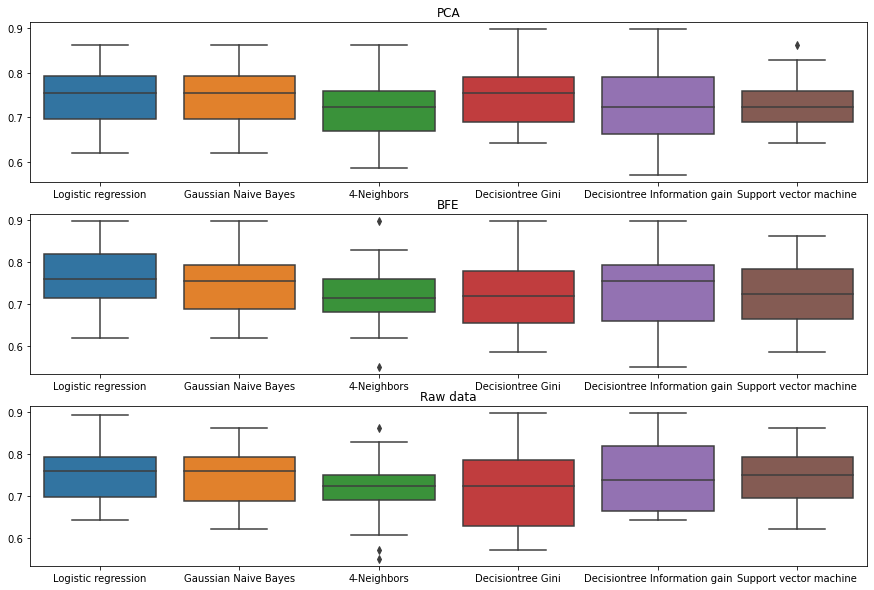

In [51]:
f, ax = plt.subplots(figsize=(15,10))
plt.subplot(3, 1, 1)
ax = sns.boxplot(data=results_PCA)
ax.set_title("PCA")
ax.set_xticklabels(modelnames)

plt.subplot(3, 1, 2)
ax = sns.boxplot(data=results_BFE)
ax.set_title("BFE")
ax.set_xticklabels(modelnames)

plt.subplot(3, 1, 3)
ax = sns.boxplot(data=results)
ax.set_xticklabels(modelnames)
ax.set_title("Raw data")
#plt.savefig('modelsvsdata.eps', format='eps', dpi=1000)

Still no sign of significantly better accuracy for any of the data sets, different models perform differently across the datasets. Logistic regression seems to be the best performing model. 

# Confusion Matrixes and validation data

Since k-fold-cross validation did not give us any clear information, lets have a look at the confusion matrixes and accuracy on the validation data for the different models.

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = zip(modelnames,[LR, GB, KN, DT_GINI, DT_IG, SV])

i=1
xlabel = ["Predicted 0","Predicted 1"]
ylabel = ["True 0","True 1"]
plt.figure(figsize=(20, 10))

for name, model in models:
    model.fit(PCA_x_train, y_train)
    predictions=model.predict(PCA_x_val)
    #y_val
    conf_PCA = (confusion_matrix(y_val,predictions))
    plt.subplot(3, 6, i)
    sns.heatmap(conf_PCA, annot=True, xticklabels=xlabel, yticklabels=ylabel)    
    acc = (accuracy_score(x_test,predictions))
    plt.title(name + "\n PCA " + '{0:.{1}f}'.format(acc, 3))
    model.fit(BFE_x_train, y_train)
    predictions=model.predict(BFE_x_val)
    conf_BFE = (confusion_matrix(y_val,predictions))
    plt.subplot(3, 6, i+6)
    sns.heatmap(conf_BFE, annot=True, xticklabels=xlabel, yticklabels=ylabel)  
    acc = (accuracy_score(y_val,predictions))
    plt.title("BFE " + '{0:.{1}f}'.format(acc, 3))
    model.fit(x_train, y_train)
    predictions=model.predict(x_val)
    conf = (confusion_matrix(y_val,predictions))
    plt.subplot(3, 6, i+12)
    sns.heatmap(conf, annot=True, xticklabels=xlabel, yticklabels=ylabel)  
    acc = (accuracy_score(y_val,predictions))
    plt.title("All Data " + '{0:.{1}f}'.format(acc, 3))
    i = i + 1

plt.tight_layout()
#plt.savefig('confusion.eps', format='eps', dpi=1000)

NameError: name 'y_val' is not defined

<Figure size 1440x720 with 0 Axes>

Look at that, apparently almost all models predict the unseen validation badly. The model that classifies the validation set significantly better is the decision trees. As we inspect the confusion matrix we note that most of the models have almost identical predictions when it comes to instances with true negative outcomes. Where they differ and where some of the the decision trees is superior is when we try to predict true positive outcomes. Many of the models are worse than random guessing. So why is this? It's called the False positive paradox. Basically since the majority of the instances has outcome not diabetes our models will favor predicting not diabetes. 

In [53]:
print("Number of training instances with outcome diabetes", np.count_nonzero(y_train))
print("Number of training instances with outcome not diabetes", len(y_train)-np.count_nonzero(y_train))

Number of training instances with outcome diabetes 184
Number of training instances with outcome not diabetes 334


This leads to another paradox, namely the accuracy paradox. Basically it means that because of the inbalance in outcomes predictive models with a given certain accuracy might have greater predictive capability than a model with higher accuracy. For example, a model with a 1:10 ratio between positive and negative outcomes, say 15 and 150. Predicting everything as negative gives us

In [54]:
example_train = [1 if i%10==0 else 0 for i in range(100)]
prediction = [0 for i in range(len(example_train))]
print("An accuracy when 10:1 ratio of", accuracy_score(example_train,prediction))

example_train = [1 if i < 102 else 0 for i in range(102+213)]
prediction = [0 for i in range(len(example_train))]
print("An accuracy when 2:1 ratio (our case) of", accuracy_score(example_train,prediction))

An accuracy when 10:1 ratio of 0.9
An accuracy when 2:1 ratio (our case) of 0.6761904761904762


Our completely useless models with zero predictive power have 90% respectively 68% accuracy. In our data the inbalance is not as sever but the moral remains. Hence we exchange accuracy as metric in favor of AUC - The area under the ROC (receiver operating characteristic) curve. The ROC curve is the true positive rate (TPR) against the false positive rate (FPR) at various thresholds/ranks for the instances. The area under the curve measures discrimination, the ability to correctly classify those with and without diabetes in our case. An simple interpretation is the following: consider if we randomly draw one person that has diabetes and one without, the person with high ranking (or low) should be the one with diabetes. The area under the curve is the percentage of randomly drawn pairs for which this is true.

In [55]:
from sklearn.metrics import roc_auc_score

print("PCA AUC")
for name, model in zip(modelnames,[LR, GB, KN, DT_GINI, DT_IG, SV]):
    model.fit(PCA_x_train, y_train)
    predictions=model.predict(PCA_x_val)
    roc = (roc_auc_score(y_val,predictions))
    print(name, roc)
    
print("\nBFE AUC")
for name, model in zip(modelnames,[LR, GB, KN, DT_GINI, DT_IG, SV]):
    model.fit(BFE_x_train, y_train)
    predictions=model.predict(BFE_x_val)
    roc = (roc_auc_score(y_val,predictions))
    print(name, roc)

print("\nAll data AUC")
for name, model in zip(modelnames,[LR, GB, KN, DT_GINI, DT_IG, SV]):
    model.fit(x_train, y_train)
    predictions=model.predict(x_val)
    roc = (roc_auc_score(y_val,predictions))
    print(name, roc)

PCA AUC


NameError: name 'y_val' is not defined

 Inspecting the confusion matrixes and AUC scores we note that the absolutely best model is the decision tree with gini impurity or entropy and using all the data, hence that is the model we'll move on with. This is good in the sense that interpretability is available, somethinng that might be important.

# Optimizing the decision tree

As familiar decision trees have high variance. As such we now look at the effect of increasing the maximum depth of the tree and at the same time inspecting the deviation of 100 trees at that depth. The maximum leaf nodes is fixed to avoid overfitting.

NameError: name 'y_val' is not defined

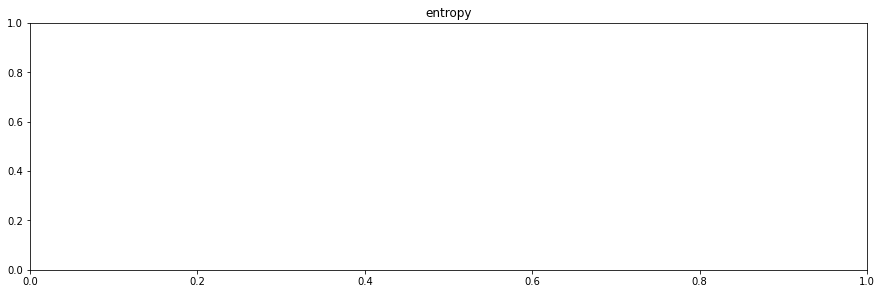

In [56]:
from sklearn.metrics import roc_auc_score
def exploredepth(cr, max_leaf_nodes):
    depth = np.arange(1,10,1)
    t = []
    v = []
    stdt = []
    stdv = []
    conf = []
    falpos = []
    falneg = []
    for i in depth:
        train_loss = []
        val_loss = []
        conf = []
        conf2 = []
        for j in range(1,100):
            model = DecisionTreeClassifier(criterion=cr, splitter='best', 
                                       max_depth=i, min_samples_split=2, min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                                       max_leaf_nodes=max_leaf_nodes, min_impurity_split=1e-07, 
                                           class_weight=None)
            model.fit(x_train, y_train)
            val_loss.append((roc_auc_score(y_val,model.predict(x_val))))
            train_loss.append((roc_auc_score(y_train,model.predict(x_train))))
            c = confusion_matrix(y_val,model.predict(x_val))
            conf.append(c[1][0])
            conf2.append(c[0][1])
        falpos.append(np.mean(conf))
        falneg.append(np.mean(conf2))
        t.append(np.mean(train_loss))
        stdt.append(np.std(train_loss))
        v.append(np.mean(val_loss))
        stdv.append(np.std(val_loss))
    lw = 2
    plt.plot(depth,t,color="darkorange")
    tp =plt.fill_between(depth, np.array(t) - np.array(stdt),
                     np.array(t) + np.array(stdt), alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(depth,v,color = "navy")
    vp = plt.fill_between(depth, np.array(v) - np.array(stdv),
                     np.array(v) + np.array(stdv), alpha=0.2,
                     color="navy", lw=lw)
    fp = plt.scatter(depth, np.array(falpos)/10.0, color="red")
    fn = plt.scatter(depth, np.array(falneg)/10.0, color="green")
    plt.legend((tp,vp,fp,fn),
               ['validation AUC','training AUC','Number of false negatives (1e-1)','Number of false positives (1e-1)']
               , loc='lower left')
    plt.xlabel('Depth')

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.title('entropy')
exploredepth('entropy', 25)

plt.subplot(2,1,2)
plt.title('gini')
exploredepth('gini', 25)
#plt.savefig('xploredepth.eps', format='eps', dpi=1000)

The plot does not imply any overfitting, by inspection the best model is the decision tree with entropy criterion using a leaf node bound of 25, and depth bound of 6. 

## Parameter search

To do a more rigorus parameter search we're gonna search an selected subset of the parameters.

In [57]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import zero_one_loss, f1_score
from Utilities.utils import gridsearch

model = DecisionTreeClassifier() # Our model
param_grid = {"max_depth": np.arange(2,8,1), # Maximum depth of tree
              "max_features": np.arange(3,8,1), # Number of features to consider when looking for the best split
              "max_leaf_nodes": np.arange(4,27,1), # Maximum number of leaves in our tree.
              "criterion": ["gini", "entropy"], # Splitting criteria
              "class_weight": [None, 'balanced',{0: 1.105, 1: 1.15}] # Weights associated with classes.
            }

metric = roc_auc_score # Metric to use
tiebreaker = zero_one_loss # Tie breaker metric.
n_best_grids = 10 # 5 best grids

best_score, best_grid, tiebreaker = gridsearch(model, x_train, y_train, x_val, y_val, param_grid, metric, 
                                               n_best_grids, loss=False, tiebreaker=tiebreaker)

        
for a,t,g in zip(best_score, tiebreaker, best_grid):
    print("AUC:",a) 
    print("Tie",t)
    print("Grid:",g)

NameError: name 'x_val' is not defined

In [58]:
model.set_params(**best_grid[0])
model.fit(x_train,y_train)
c = confusion_matrix(y_val,model.predict(x_val))
sns.heatmap(c, annot=True, xticklabels=xlabel, yticklabels=ylabel) 
print(c)

NameError: name 'best_grid' is not defined

This seems like a good result and we could naively choose this single tree, or any of the top 10 combinations as they have the same error, as our model. The problem is that every time we run the parameter search another combination of parameters will be the best tree because of the intrinsic variance of decision trees, additionally these trees will have a really good error as well because of the natural low bias of decision trees. Remember that the trees are tuned to the validation set and might, probably wont, generalize good to new data.

But there is some pattern to what sort of combinations work for the problem. For the entropy criterion trees the best performing ones the maximum depth is between 5 and 7, the maximum number of leaves between 22 and 26, the maximum number of features to consider on each split around 7 and using balanced weighting for the classes. The balanced weighting adjust the weights for the classes inversely proportional to class frequencies, basically counteracting the false positive hypothesis mentioned earlier. 

For the gini criterion trees the best performing ones the maximum depth is around 7, the maximum number of leaves varies a lot but tend to approach higher values (≈25), the maximum number of features to consider on each split around 7 and using the proposed weighting for the classes.

To decrease variance and try to make our model to generalize we use need to use an ensemble. The first that comes to mind is trying Bootstrap aggregating or a random forest. It should theoretically provide the stability we need and reduces variance.

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()

0.6830883119591282

In [60]:
RF_clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(RF_clf, X, Y, cv=5)
scores.mean()

0.7424043373996454

In [61]:
ET_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(ET_clf, X, Y, cv=5)
#scores.mean() > 0.999
scores.mean()

0.7251172974663748

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
DT_scores = cross_val_score(DT_clf, X, Y, cv=5)
DT_scores.mean()


RF_clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(RF_clf, X, Y, cv=5)
scores.mean()


ET_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(ET_clf, X, Y, cv=5)
scores.mean() > 0.999


False

In [63]:
#x_train, x_test, y_train, y_test
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


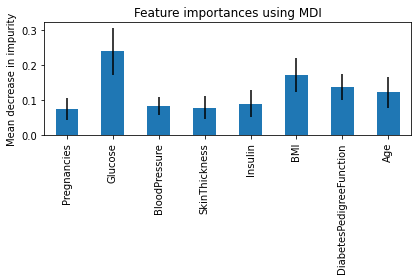

In [65]:
import pandas as pd
feature_names=X.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [66]:
#New data

In [84]:

DiabScreening_data = pd.read_csv('DiabScreening.csv')
DiabPhysExam_data = pd.read_csv('DiabPhysExam.csv')

DiabPhysExam=DiabPhysExam_data[['PtID','BldPrSys','BldPrDia','PEHeartRt','FingStkBG','PEAbnormal']]
DiabPhysExam

PtID  BldPrSys  BldPrDia  PEHeartRt  FingStkBG PEAbnormal
0      33     107.0      55.0        NaN        NaN         No
1     137      95.0      79.0        NaN        NaN         No
2     136      95.0      52.0       69.0        NaN         No
3      42     114.0      62.0       59.0        NaN         No
4      37      99.0      72.0       87.0        NaN         No
..    ...       ...       ...        ...        ...        ...
267    68     100.0      54.0       83.0        NaN         No
268    61       NaN       NaN        NaN        NaN         No
269   161       NaN       NaN      112.0      209.0         No
270    53      92.0      57.0      104.0        NaN         No
271    78     100.0      66.0       84.0        NaN         No

[272 rows x 6 columns]

In [85]:
C={'Yes':1,'No':0}
DiabPhysExam['PEAbnormal']=DiabScreening_data['PEAbnormal'].map(C).fillna(DiabScreening_data['PEAbnormal'])
DiabPhysExam1 = DiabPhysExam.fillna(DiabPhysExam.mean())
#Diab1=Diab.fillna(Diab.mean())
DiabPhysExam1
DiabPhysExam2=DiabPhysExam1.fillna(0)
DiabPhysExam2

PtID    BldPrSys   BldPrDia   PEHeartRt  FingStkBG PEAbnormal
0      33  107.000000  55.000000   93.663462    247.316          0
1     137   95.000000  79.000000   93.663462    247.316          0
2     136   95.000000  52.000000   69.000000    247.316          0
3      42  114.000000  62.000000   59.000000    247.316          0
4      37   99.000000  72.000000   87.000000    247.316          0
..    ...         ...        ...         ...        ...        ...
267    68  100.000000  54.000000   83.000000    247.316          0
268    61  101.424107  62.736607   93.663462    247.316          0
269   161  101.424107  62.736607  112.000000    209.000          0
270    53   92.000000  57.000000  104.000000    247.316          0
271    78  100.000000  66.000000   84.000000    247.316          0

[272 rows x 6 columns]

In [86]:

DiabScreening = DiabScreening_data.fillna(DiabScreening_data.mean())

DiabScreening


#DiabScreening_data

RecID  PtID  ParentLoginVisitID  EligCritMet  ExclCritAbsent Gender  \
0       57    33              141700            1               1      F   
1       77   137              144656            1               1      M   
2       62   136              142115            1               1      M   
3       70    42              142675            1               1      F   
4       78    37              144713            1               1      M   
..     ...   ...                 ...          ...             ...    ...   
395     40    50              137471            1               1      M   
396     41     6              137680            1               1      M   
397     56    57              141353            1               1      F   
398     53    19              140832            1               1      M   
399     85   107              145819            1               1      M   

                  Ethnicity                    Race        DiagDt  DiagAge  \
0    Not Hispanic or Latino                   White   5/7/94 0:00        1   
1    Not Hispanic or Latino  Black/African American   5/9/95 0:00        1   
2    Not Hispanic or Latino                   White  5/19/94 0:00        1   
3    Not Hispanic or Latino                   White   4/5/98 0:00        4   
4    Not Hispanic or Latino                   White  1/12/98 0:00        4   
..                      ...                     ...           ...      ...   
395  Not Hispanic or Latino                   White   3/1/96 0:00        1   
396  Not Hispanic or Latino                   White  6/21/97 0:00        2   
397  Not Hispanic or Latino                   White   7/5/98 0:00        3   
398  Not Hispanic or Latino                   White  2/28/95 0:00        1   
399  Not Hispanic or Latino                   White  9/28/96 0:00        2   

     ...      Height  HeightUnits  HeightUnk    BldPrSys  BldPrDia  BldPrUnk  \
0    ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   
1    ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   
2    ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   
3    ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   
4    ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   
..   ...         ...          ...        ...         ...       ...       ...   
395  ...  115.200000           cm        NaN  104.000000  61.00000      32.4   
396  ...  117.000000           cm        NaN   92.000000  60.00000      32.4   
397  ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   
398  ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   
399  ...  115.782243          NaN        NaN  100.989474  66.62037      32.4   

     PEAbnormal  PreExistMedCond  PtCurrMed SHNumEverB  
0           NaN              Yes         No        NaN  
1           NaN               No         No        NaN  
2           NaN              NaN         No         No  
3           NaN               No         No        NaN  
4           NaN              Yes         No        NaN  
..          ...              ...        ...        ...  
395          No               No         No        NaN  
396          No              Yes         No        NaN  
397         NaN               No        Yes        NaN  
398         NaN              Yes        Yes        NaN  
399         NaN               No         No        NaN  

[400 rows x 43 columns]

In [87]:
DiabScreening_data.columns

Index(['RecID', 'PtID', 'ParentLoginVisitID', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Ethnicity', 'Race', 'DiagDt', 'DiagAge', 'SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months', 'InsModPump', 'InsModInjections', 'InsModInhaled',
       'InsModNone', 'PumpUse', 'PumpType', 'UnitsInsTotal',
       'UnitsInsBasilOrLongAct', 'NumPumpBolusOrShortAct', 'BGTestAvgNumMeter',
       'BGTestMetDatNotAvail', 'BGTestAvgNumPtRep', 'BGTestPtRepNotAvail',
       'CGMUseStat', 'CGMUseDur', 'Weight', 'WeightUnits', 'WeightUnk',
       'Height', 'HeightUnits', 'HeightUnk', 'BldPrSys', 'BldPrDia',
       'BldPrUnk', 'PEAbnormal', 'PreExistMedCond', 'PtCurrMed', 'SHNumEverB'],
      dtype='object')

In [88]:
Q={'Yes':1,'No':0, 'NaN':0}
DiabScreening_data['PreExistMedCond']=DiabScreening_data['PreExistMedCond'].map(Q).fillna(DiabScreening_data['PreExistMedCond'])
R={'Yes':1,'No':0}
DiabScreening_data['PtCurrMed']=DiabScreening_data['PtCurrMed'].map(R).fillna(DiabScreening_data['PtCurrMed'])
A={'M':1,'F':0}
DiabScreening_data['Gender']=DiabScreening_data['Gender'].map(A).fillna(DiabScreening_data['Gender'])
B={'Animas One Touch Ping':1,'Animas Vibe':2, 'Insulet OmniPod Insulin Management System':3,'Medtronic 551 (530G)':4,'Medtronic Paradigm 523 (Revel)':5,'Medtronic Paradigm 723 (Revel)':6,'MiniMed 630G':7,'Tandem t:slim':8,'Tandem t:slim X2':9,'Other':10}
DiabScreening_data['PumpType']=DiabScreening_data['PumpType'].map(B).fillna(DiabScreening_data['PumpType'])
D={'Yes':1,'No':0}
DiabScreening_data['PEAbnormal']=DiabScreening_data['PEAbnormal'].map(D).fillna(DiabScreening_data['PEAbnormal'])
E={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['DKAMostRecent']=DiabScreening_data['DKAMostRecent'].map(E).fillna(DiabScreening_data['DKAMostRecent'])
F={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['DKAMostRecent']=DiabScreening_data['DKAMostRecent'].map(F).fillna(DiabScreening_data['DKAMostRecent'])
G={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['SHMostRecent']=DiabScreening_data['SHMostRecent'].map(G).fillna(DiabScreening_data['SHMostRecent'])

In [89]:
DiabScreening_data
Diab=DiabScreening_data[['PtID','PreExistMedCond','PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33              1.0          0            1               1       0   
1     137              0.0          0            1               1       1   
2     136              NaN          0            1               1       1   
3      42              0.0          0            1               1       0   
4      37              1.0          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50              0.0          0            1               1       1   
396     6              1.0          0            1               1       1   
397    57              0.0          1            1               1       0   
398    19              1.0          1            1               1       1   
399   107              0.0          0            1               1       1   

     Weight  Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0       NaN     NaN         1.0               NaN       8.0        1   
1       NaN     NaN         1.0               NaN       7.0        1   
2       NaN     NaN         1.0               NaN       5.0        1   
3       NaN     NaN         1.0               NaN       1.0        4   
4       NaN     NaN         1.0               NaN       1.0        4   
..      ...     ...         ...               ...       ...      ...   
395    21.7   115.2         NaN               1.0       NaN        1   
396    22.3   117.0         NaN               1.0       NaN        2   
397     NaN     NaN         NaN               1.0       NaN        3   
398     NaN     NaN         NaN               1.0       NaN        1   
399     NaN     NaN         1.0               NaN       3.0        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN             0           0                     NaN   
1          NaN             0           0                     NaN   
2          NaN             1           1                     1.0   
3          NaN             0           0                     NaN   
4          NaN             0           0                     NaN   
..         ...           ...         ...                     ...   
395        0.0             0           0                     NaN   
396        0.0             0           0                     NaN   
397        NaN             0           0                     NaN   
398        NaN             5           1                     1.0   
399        NaN             3           1                     0.0   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [90]:
Diab=Diab.fillna(Diab.mean())
Diab

#Diab=Diab[13].fillna(0, inplace=True)

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN             0           0                0.692308   
1          NaN             0           0                0.692308   
2          NaN             1           1                1.000000   
3          NaN             0           0                0.692308   
4          NaN             0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0             0           0                0.692308   
396        0.0             0           0                0.692308   
397        NaN             0           0                0.692308   
398        NaN             5           1                1.000000   
399        NaN             3           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [91]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
Diab1=DiabScreening_data[['PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab1
feature_names=Diab1.columns
feature_names


Index(['PtCurrMed', 'EligCritMet', 'ExclCritAbsent', 'Gender', 'Weight',
       'Height', 'InsModPump', 'InsModInjections', 'PumpType', 'DiagAge',
       'PEAbnormal', 'SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months',
       'DKAMostRecent', 'DKANumLast12Months'],
      dtype='object')

In [92]:
import pandas as pd
feature_names=Diab.columns
feature_names
DiabScreening_data
Diab=DiabScreening_data[['PtID','PreExistMedCond','PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33              1.0          0            1               1       0   
1     137              0.0          0            1               1       1   
2     136              NaN          0            1               1       1   
3      42              0.0          0            1               1       0   
4      37              1.0          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50              0.0          0            1               1       1   
396     6              1.0          0            1               1       1   
397    57              0.0          1            1               1       0   
398    19              1.0          1            1               1       1   
399   107              0.0          0            1               1       1   

     Weight  Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0       NaN     NaN         1.0               NaN       8.0        1   
1       NaN     NaN         1.0               NaN       7.0        1   
2       NaN     NaN         1.0               NaN       5.0        1   
3       NaN     NaN         1.0               NaN       1.0        4   
4       NaN     NaN         1.0               NaN       1.0        4   
..      ...     ...         ...               ...       ...      ...   
395    21.7   115.2         NaN               1.0       NaN        1   
396    22.3   117.0         NaN               1.0       NaN        2   
397     NaN     NaN         NaN               1.0       NaN        3   
398     NaN     NaN         NaN               1.0       NaN        1   
399     NaN     NaN         1.0               NaN       3.0        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN             0           0                     NaN   
1          NaN             0           0                     NaN   
2          NaN             1           1                     1.0   
3          NaN             0           0                     NaN   
4          NaN             0           0                     NaN   
..         ...           ...         ...                     ...   
395        0.0             0           0                     NaN   
396        0.0             0           0                     NaN   
397        NaN             0           0                     NaN   
398        NaN             5           1                     1.0   
399        NaN             3           1                     0.0   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [93]:
Diabetes_Data = pd.merge(Diab, DiabPhysExam2, how='left', left_on='PtID', right_on = 'PtID',right_index=True)
Diabetes_Data
#left_on='[A_c1,c2]', right_on = '[B_c1,c2]'
#patients_enc_med = pd.merge(patients_enc, medications1, how='left', left_on='pid', right_on='pid')

PtID_x  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0        33              1.0          0            1               1       0   
1       137              0.0          0            1               1       1   
2       136              NaN          0            1               1       1   
3        42              0.0          0            1               1       0   
4        37              1.0          0            1               1       1   
..      ...              ...        ...          ...             ...     ...   
395      50              0.0          0            1               1       1   
396       6              1.0          0            1               1       1   
397      57              0.0          1            1               1       0   
398      19              1.0          1            1               1       1   
399     107              0.0          0            1               1       1   

     Weight  Height  InsModPump  InsModInjections  ...  SHSeizComa  \
0       NaN     NaN         1.0               NaN  ...           0   
1       NaN     NaN         1.0               NaN  ...           0   
2       NaN     NaN         1.0               NaN  ...           1   
3       NaN     NaN         1.0               NaN  ...           0   
4       NaN     NaN         1.0               NaN  ...           0   
..      ...     ...         ...               ...  ...         ...   
395    21.7   115.2         NaN               1.0  ...           0   
396    22.3   117.0         NaN               1.0  ...           0   
397     NaN     NaN         NaN               1.0  ...           0   
398     NaN     NaN         NaN               1.0  ...           1   
399     NaN     NaN         1.0               NaN  ...           1   

     SHSeizComaLast12Months DKAMostRecent  DKANumLast12Months  PtID_y  \
0                       NaN           1.0                   1      38   
1                       NaN           0.0                   0     135   
2                       1.0           1.0                   1      89   
3                       NaN           0.0                   0      70   
4                       NaN           3.0                   0       7   
..                      ...           ...                 ...     ...   
395                     NaN           0.0                   0      23   
396                     NaN           3.0                   0     122   
397                     NaN           0.0                   0     134   
398                     1.0           4.0                   0     152   
399                     0.0           3.0                   0      63   

       BldPrSys   BldPrDia   PEHeartRt  FingStkBG  PEAbnormal_y  
0     83.000000  51.000000   81.000000    160.000           0.0  
1     95.000000  67.000000   75.000000    247.316             0  
2    103.000000  61.000000   66.000000    247.316             0  
3    107.000000  73.000000   85.000000    109.000           0.0  
4    109.000000  69.000000  104.000000    267.000             0  
..          ...        ...         ...        ...           ...  
395   90.000000  57.000000   86.000000    247.316             0  
396   88.000000  64.000000   78.000000    247.316             0  
397  100.000000  56.000000   82.000000    131.000             0  
398  110.000000  68.000000  103.000000    247.316           0.0  
399  101.424107  62.736607   93.663462    247.316             0  

[400 rows x 24 columns]

In [94]:
Diab1=Diab.fillna(Diab.mean())
Diab1

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN             0           0                0.692308   
1          NaN             0           0                0.692308   
2          NaN             1           1                1.000000   
3          NaN             0           0                0.692308   
4          NaN             0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0             0           0                0.692308   
396        0.0             0           0                0.692308   
397        NaN             0           0                0.692308   
398        NaN             5           1                1.000000   
399        NaN             3           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [95]:
Diab1['PEAbnormal'].fillna(0, inplace=True)
Diab1

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0            0             0           0                0.692308   
1            0             0           0                0.692308   
2            0             1           1                1.000000   
3            0             0           0                0.692308   
4            0             0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0             0           0                0.692308   
396        0.0             0           0                0.692308   
397          0             0           0                0.692308   
398          0             5           1                1.000000   
399          0             3           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [96]:
Yd = Diab1['SHSeizComa']
Xd = Diab1.drop(['SHSeizComa'], axis=1)

In [97]:
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.20, random_state=42)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
lm = LinearRegression()
model_1=lm.fit(Xd_train, Yd_train)


pd.DataFrame(model_1.coef_.T,Xd.columns,columns=['Coefficient'])

predictions_1 = model_1.predict(Xd_test)
predictions_1
model_1.score(Xd_train, Yd_train)
Xd_train_sm = sm.add_constant(Xd_train)

ls = sm.OLS(Yd_train,Xd_train_sm).fit()
print(ls.summary())


print("Mean squared error: %.2f" % np.mean((model_1.predict(Xd_test) - Yd_test) ** 2))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [103]:
np.asarray(Diab1)

array([[33, 1.0, 0, ..., 0.6923076923076923, 1.0, 1],
       [137, 0.0, 0, ..., 0.6923076923076923, 0.0, 0],
       [136, 0.18498659517426275, 0, ..., 1.0, 1.0, 1],
       ...,
       [57, 0.0, 1, ..., 0.6923076923076923, 0.0, 0],
       [19, 1.0, 1, ..., 1.0, 4.0, 0],
       [107, 0.0, 0, ..., 0.0, 3.0, 0]], dtype=object)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
lm = LinearRegression()
model_1=lm.fit(X_train, Y_train)


pd.DataFrame(model_1.coef_.T,X.columns,columns=['Coefficient'])

predictions_1 = model_1.predict(X_test)
predictions_1
model_1.score(X_train, Y_train)
X_train_sm = sm.add_constant(X_train)
ls = sm.OLS(Y_train,X_train_sm).fit()
print(ls.summary())


print("Mean squared error: %.2f" % np.mean((model_1.predict(X_test) - Y_test) ** 2))

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     29.15
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           7.13e-38
Time:                        18:42:30   Log-Likelihood:                -279.67
No. Observations:                 552   AIC:                             577.3
Df Residuals:                     543   BIC:                             616.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     29.15
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           7.13e-38
Time:                        18:53:19   Log-Likelihood:                -279.67
No. Observations:                 552   AIC:                             577.3
Df Residuals:                     543   BIC:                             616.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

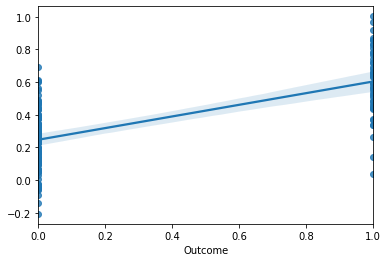

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lm = LinearRegression()
model_1=lm.fit(X_train, Y_train)


pd.DataFrame(model_1.coef_.T,X.columns,columns=['Coefficient'])

predictions_1 = model_1.predict(X_test)
sns.regplot(Y_test,predictions_1)

model_1.score(X_train, Y_train)


import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
ls = sm.OLS(Y_train,X_train_sm).fit()
print(ls.summary())


print("Mean squared error: %.2f" % np.mean((model_1.predict(X_test) - Y_test) ** 2))

In [105]:
lm_logistic = LogisticRegression(random_state=0,max_iter=200)
model_logistic = lm_logistic.fit(X_train, Y_train.values.ravel())
model_logistic
model_logistic.score(X_test, Y_test)
pred_proba_df = pd.DataFrame(model_logistic.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = np.array(pred_proba_df.iloc[:,1].apply(lambda x: 1 if x>i else 0))
    test_accuracy = metrics.accuracy_score(np.array(Y_test), y_test_pred)
    print('Our testing accuracy is {}'.format(test_accuracy))


******** For i = 0.05 ******
Our testing accuracy is 0.38848920863309355

******** For i = 0.1 ******
Our testing accuracy is 0.4892086330935252

******** For i = 0.15 ******
Our testing accuracy is 0.5683453237410072

******** For i = 0.2 ******
Our testing accuracy is 0.6330935251798561

******** For i = 0.25 ******
Our testing accuracy is 0.7122302158273381

******** For i = 0.3 ******
Our testing accuracy is 0.762589928057554

******** For i = 0.35 ******
Our testing accuracy is 0.7769784172661871

******** For i = 0.4 ******
Our testing accuracy is 0.8201438848920863

******** For i = 0.45 ******
Our testing accuracy is 0.8345323741007195

******** For i = 0.5 ******
Our testing accuracy is 0.8489208633093526

******** For i = 0.55 ******
Our testing accuracy is 0.8345323741007195

******** For i = 0.6 ******
Our testing accuracy is 0.8201438848920863

******** For i = 0.65 ******
Our testing accuracy is 0.8201438848920863

******** For i = 0.7 ******
Our testing accuracy is 0.82

Epoch 1/30
320/320 [==============================] - 0s 597us/step - loss: 0.4393 - accuracy: 0.9031
Epoch 2/30
320/320 [==============================] - 0s 131us/step - loss: 0.3417 - accuracy: 0.9094
Epoch 3/30
320/320 [==============================] - 0s 133us/step - loss: 0.3048 - accuracy: 0.9031
Epoch 4/30
320/320 [==============================] - 0s 121us/step - loss: 0.3020 - accuracy: 0.9031
Epoch 5/30
320/320 [==============================] - 0s 117us/step - loss: 0.2853 - accuracy: 0.9062
Epoch 6/30
320/320 [==============================] - 0s 117us/step - loss: 0.2784 - accuracy: 0.8938
Epoch 7/30
320/320 [==============================] - 0s 116us/step - loss: 0.2446 - accuracy: 0.9125
Epoch 8/30
320/320 [==============================] - 0s 115us/step - loss: 0.2290 - accuracy: 0.9219
Epoch 9/30
320/320 [==============================] - 0s 115us/step - loss: 0.2083 - accuracy: 0.9094
Epoch 10/30
320/320 [==============================] - 0s 115us/step - loss: 0.194

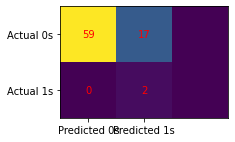

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import math
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from skmultilearn.adapt import MLkNN


#Deep learning model

model_11 = Sequential()
model_11.add(Dense(12, input_dim=17, activation='relu'))
model_11.add(Dense(10, activation='relu'))
model_11.add(Dense(1, activation='sigmoid'))

model_11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model_11.fit(Xd_train, Yd_train, epochs=30, batch_size=10)
# evaluate the keras model
_, accuracy = model_11.evaluate(Xd_test, Yd_test)
print('Accuracy: %.2f' % (accuracy*100))


#Accuracy Prediction
model_11.predict(Xd_test)
prediction_11= model_11.predict(Xd_test)
prediction_11[prediction_11 < 0.1] = 0
prediction_11[prediction_11 >= 0.1] = 1

metrics.accuracy_score(prediction_11,Yd_test)


from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model_p = Sequential()
model_p.add(Dense(12, input_dim=10, activation='relu'))
model_p.add(Dense(10, activation='relu'))
model_p.add(Dense(1, activation='sigmoid'))
plot_model(model_p, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


cm = metrics.confusion_matrix(Yd_test,prediction_11) 
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [113]:
#x_train, x_test, y_train, y_test
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(Xd.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(Xd_train, Yd_train)

RandomForestClassifier(random_state=0)

In [114]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


In [115]:
Diab1

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0            0             0           0                0.692308   
1            0             0           0                0.692308   
2            0             1           1                1.000000   
3            0             0           0                0.692308   
4            0             0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0             0           0                0.692308   
396        0.0             0           0                0.692308   
397          0             0           0                0.692308   
398          0             5           1                1.000000   
399          0             3           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [117]:
feature_names3

Index(['PtID', 'PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Weight', 'Height', 'InsModPump', 'InsModInjections',
       'PumpType', 'DiagAge', 'PEAbnormal', 'SHMostRecent',
       'SHSeizComaLast12Months', 'DKAMostRecent', 'DKANumLast12Months'],
      dtype='object')

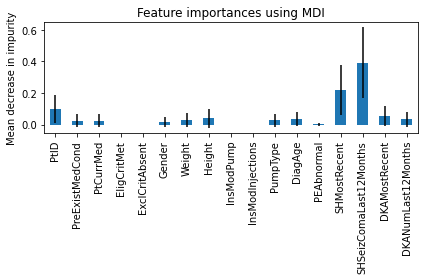

In [116]:
import pandas as pd
feature_names3=Xd.columns

forest_importances = pd.Series(importances, index=feature_names3)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
Diab['PreExistMedCond'].fillna(0, inplace=True)
Diab['Weight'].fillna(0, inplace=True)
Diab['Height'].fillna(0, inplace=True)
Diab['PreExistMedCond'].fillna(0, inplace=True)
Diab['PreExistMedCond'].fillna(0, inplace=True)
train_data = train_data.fillna(train_data.mean())
Diab['Weight'].fillna(0, inplace=True)

In [ ]:
#DiabScreening_data=DiabScreening_data.dropna()
#patients = patients[~patients.ambulatory.isna()]

#DiabScreening_data = DiabScreening_data[DiabScreening_data.HeightUnits.isna()=cm]
#DiabScreening_data.fillna('cm', inplace=True)
DiabScreening_data = DiabScreening_data[DiabScreening_data.HeightUnits.fillna(cm, inplace=True)]

In [118]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="DiagAge", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=500,height=400)
fig1.show()

# Ensembles

In [ ]:
roc = {label: [] for label in multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:,1])

In [ ]:
roc = {label: [] for label in multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:,1])

In [119]:

#Xd_train, Xd_test, Yd_train, Yd_test
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
base = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                       max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, max_features=7, random_state=None, 
                                       max_leaf_nodes=22, min_impurity_split=1e-07, 
                                           class_weight='balanced')

model = BaggingClassifier(base_estimator=base, n_estimators=100, max_samples=1.0, max_features=1.0, 
                  bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, 
                  n_jobs=1, random_state=None, verbose=0)
model.fit(Xd_train, Yd_train)
predictions = model.predict(Xd_test)
conf = (confusion_matrix(Yd_test,predictions))
auc = (roc_auc_score(Yd_test,predictions))
sns.heatmap(conf, annot=True, xticklabels=xlabel, yticklabels=ylabel)
plt.title("AUC  " + str(auc))
print(auc)
#plt.savefig('Bagging.eps', format='eps', dpi=1000)

ValueError: multi_class must be in ('ovo', 'ovr')

In [120]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, 
                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                       max_features='auto', max_leaf_nodes=22, min_impurity_split=1e-07, 
                       bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                       warm_start=False, class_weight='balanced')
model.fit(Xd_train, Yd_train)
predictions = model.predict(Xd_test)
conf = (confusion_matrix(Yd_test,predictions))
auc = (roc_auc_score(Yd_test,predictions))
sns.heatmap(conf, annot=True, xticklabels=xlabel, yticklabels=ylabel)
plt.title("AUC  " + str(auc))
print(auc)
#plt.savefig('randfor.eps', format='eps', dpi=1000)

ValueError: multi_class must be in ('ovo', 'ovr')

The ensembles seems to provide stability and decrease the variance run to run. However they seem to introduce some bias. Looking back at when we compared entropy and gini criterion and looked at the effect of the depth and variance. Remember that the gini trees generally had few false positives while entropy trees had few false negatives. An viable hypothesis might be that the two complement each other, and because we in the ensembles above only use the one or the other. To test the hypothesis we're gonna try an VotingClassifier using the parameters search result we acquired above. 

The voting classifier consists of a 5:4 ratio of entropy and gini trees since the gini trees showed less potential in the grid search. The classification is done using a majority vote rule.

In [121]:
from sklearn.ensemble import VotingClassifier
mods = []
for i in range(1,100): # 100 Trees provides low variance.
    # A parameter combination that were sucessfull for entropy trees.
    mods.append((str(i),DecisionTreeClassifier(criterion='entropy', splitter='best', 
                               max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=22, min_impurity_split=1e-07, class_weight='balanced')))
    if(i < 80):
        # A parameter combination that were sucessfull for gini trees.
        mods.append((str(i)+"gi",DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=7, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=25, min_impurity_split=1e-07, 
                                                        class_weight={0: 1.105, 1: 1.15})))
model = VotingClassifier(estimators=mods, voting='hard', n_jobs=1)
model.fit(Xd_train, Yd_train)
predictions = model.predict(Xd_test)
conf = (confusion_matrix(Yd_test,predictions))
auc = (roc_auc_score(Yd_test,predictions))
sns.heatmap(conf, annot=True, xticklabels=xlabel, yticklabels=ylabel)
print(auc)
print((roc_auc_score(Yd_train,model.predict(Xd_train))))

ValueError: multi_class must be in ('ovo', 'ovr')

The hypothesis might be true, this is a really good separation and a AUC of nearly 89 for the validation set and 93 for the training set. Thats not a gigantic difference and hopefully the constraints on the trees have prevented the model from overfitting on the training data.

# Comparing models with K-fold cross validation using accuracy

Before giving the test set a go we train our model on the entire training dataset with some imputing. We also put it into a pipeline to automate the work-flow.

In [ ]:
X = X[~X.Pregnancies.isna()]
X = X[~X.Glucose.isna()]
X = X[~X.BloodPressure.isna()]
X = X[~X.SkinThickness.isna()]
X = X[~X.Insulin.isna()]
X = X[~X.BMI.isna()]
X = X[~X.DiabetesPedigreeFunction.isna()]
X = X[~X.Age.isna()]
X = X[~X.Outcome.isna()]
X

In [ ]:
X=X.dropna()
Y=Y.dropna()
X



In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [124]:
#missing_values='NaN'
pipeline = Pipeline([("imputer", SimpleImputer(missing_values = np.nan,
                                          strategy="mean"
                                          )),
                      ("standardizer", StandardScaler()),
                      ("VotingClassifier", model)])

In [ ]:
X

In [125]:
pipeline.fit(Xd,Yd)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('standardizer', StandardScaler()),
                ('VotingClassifier',
                 VotingClassifier(estimators=[('1',
                                               DecisionTreeClassifier(class_weight='balanced',
                                                                      criterion='entropy',
                                                                      max_depth=5,
                                                                      max_leaf_nodes=22,
                                                                      min_impurity_split=1e-07)),
                                              ('1gi',
                                               DecisionTreeClassifier(class_weight={0: 1.105,
                                                                                    1: 1.15},
                                                                      max_depth=7,
                                

In [ ]:
X

In [126]:
Xd=Xd.fillna(Xd.mean())
Xd

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComaLast12Months  DKAMostRecent  \
0            0             0                0.692308            1.0   
1            0             0                0.692308            0.0   
2            0             1                1.000000            1.0   
3            0             0                0.692308            0.0   
4            0             0                0.692308            3.0   
..         ...           ...                     ...            ...   
395        0.0             0                0.692308            0.0   
396        0.0             0                0.692308            3.0   
397          0             0                0.692308            0.0   
398          0             5                1.000000            4.0   
399          0             3                0.000000            3.0   

     DKANumLast12Months  
0                     1  
1                     0  
2                     1  
3                     0  
4                     0  
..                  ...  
395                   0  
396                   0  
397                   0  
398                   0  
399                   0  

[400 rows x 17 columns]

In [127]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(Xd,Yd)
print(dt_clf)

DecisionTreeClassifier()


In [128]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

DecisionTreeClassifier()

[Text(167.40000000000003, 195.696, 'X[14] <= 0.846\ngini = 0.124\nsamples = 400\nvalue = [374, 15, 7, 2, 2]'),
 Text(100.44000000000001, 152.208, 'X[14] <= 0.346\ngini = 0.051\nsamples = 384\nvalue = [374, 6, 2, 0, 2]'),
 Text(66.96000000000001, 108.72, 'X[5] <= 0.5\ngini = 0.56\nsamples = 10\nvalue = [0, 6, 2, 0, 2]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]'),
 Text(100.44000000000001, 65.232, 'X[15] <= 3.5\ngini = 0.375\nsamples = 8\nvalue = [0, 6, 2, 0, 0]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(133.92000000000002, 108.72, 'gini = 0.0\nsamples = 374\nvalue = [374, 0, 0, 0, 0]'),
 Text(234.36, 152.208, 'X[7] <= 112.691\ngini = 0.57\nsamples = 16\nvalue = [0, 9, 5, 2, 0]'),
 Text(200.88000000000002, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]'),
 Text(267.84000000000003, 108.72, 'X[6] <=

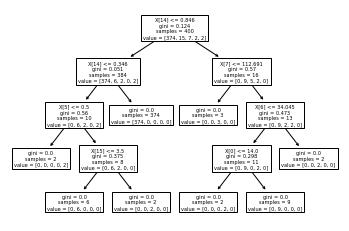

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
tree.plot_tree(dt_clf) 

In [130]:
_data = tree.export_graphviz(dt_clf, out_file="None", filled=True, rounded=True,special_characters=True)

In [131]:
import graphviz 
from graphviz import Source
_data = tree.export_graphviz(dt_clf, out_file=None)
graph = graphviz.Source(_data) 
graph.render("name of file",view = True)
import pydotplus
from IPython.display import Image 

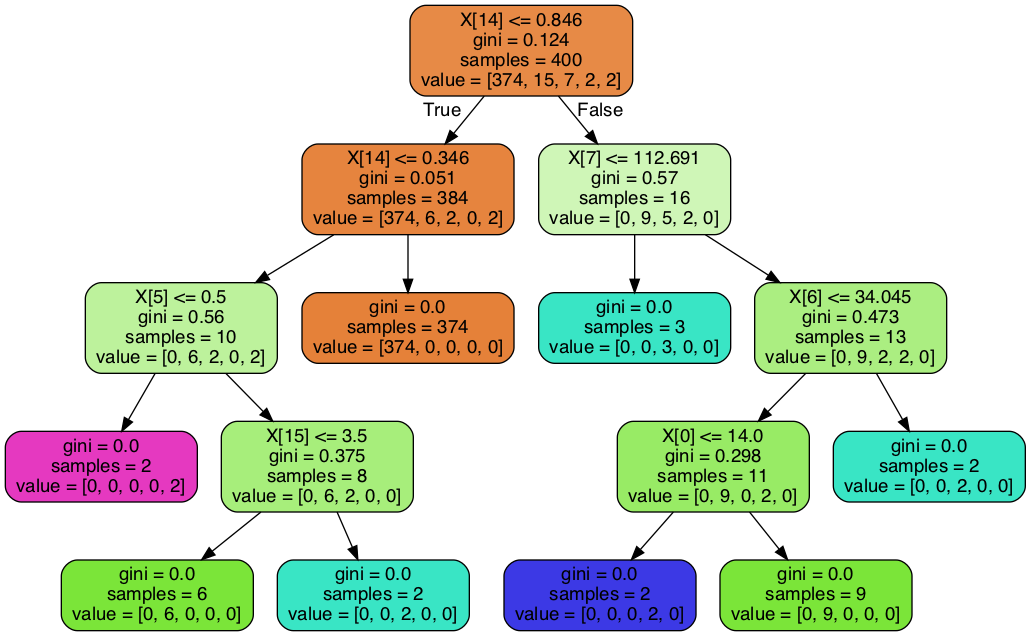

In [132]:
import pydotplus
_data = tree.export_graphviz(dt_clf, out_file=None, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(_data)  

Image(graph.create_png())

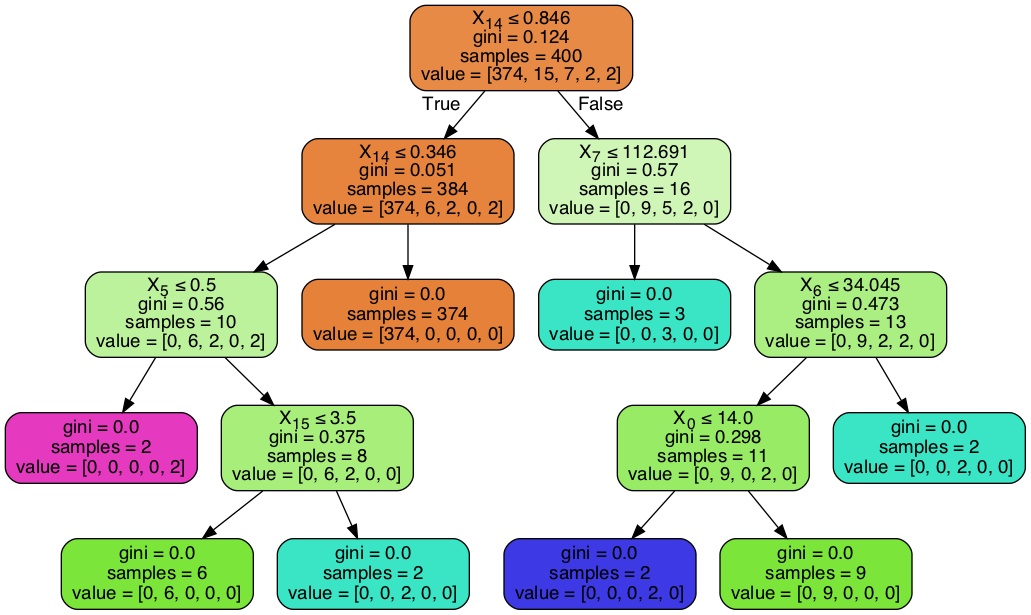

In [133]:
import pydotplus
_data = tree.export_graphviz(dt_clf, out_file=None, filled=True, rounded=True,
                special_characters=True, max_depth=6)

graph = pydotplus.graph_from_dot_data(_data)  


Image(graph.create_png())

>1, train: 0.956, test: 0.963
>2, train: 0.984, test: 0.950
>3, train: 0.997, test: 0.988
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


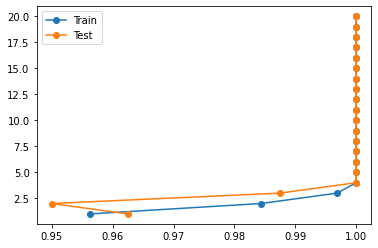

In [134]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# split into train test sets
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xd_train, Yd_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xd_train)
	train_acc = accuracy_score(Yd_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xd_test)
	test_acc = accuracy_score(Yd_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(train_scores, values, '-o', label='Train')
pyplot.plot(test_scores, values, '-o', label='Test')
pyplot.legend()
pyplot.show()

[Text(558.0, 611.55, 'X[13] <= 0.5\nentropy = 0.447\nsamples = 400\nvalue = [374, 15, 7, 2, 2]'),
 Text(279.0, 203.85000000000002, 'entropy = 0.0\nsamples = 344\nvalue = [344, 0, 0, 0, 0]'),
 Text(837.0, 203.85000000000002, 'entropy = 1.71\nsamples = 56\nvalue = [30, 15, 7, 2, 2]')]

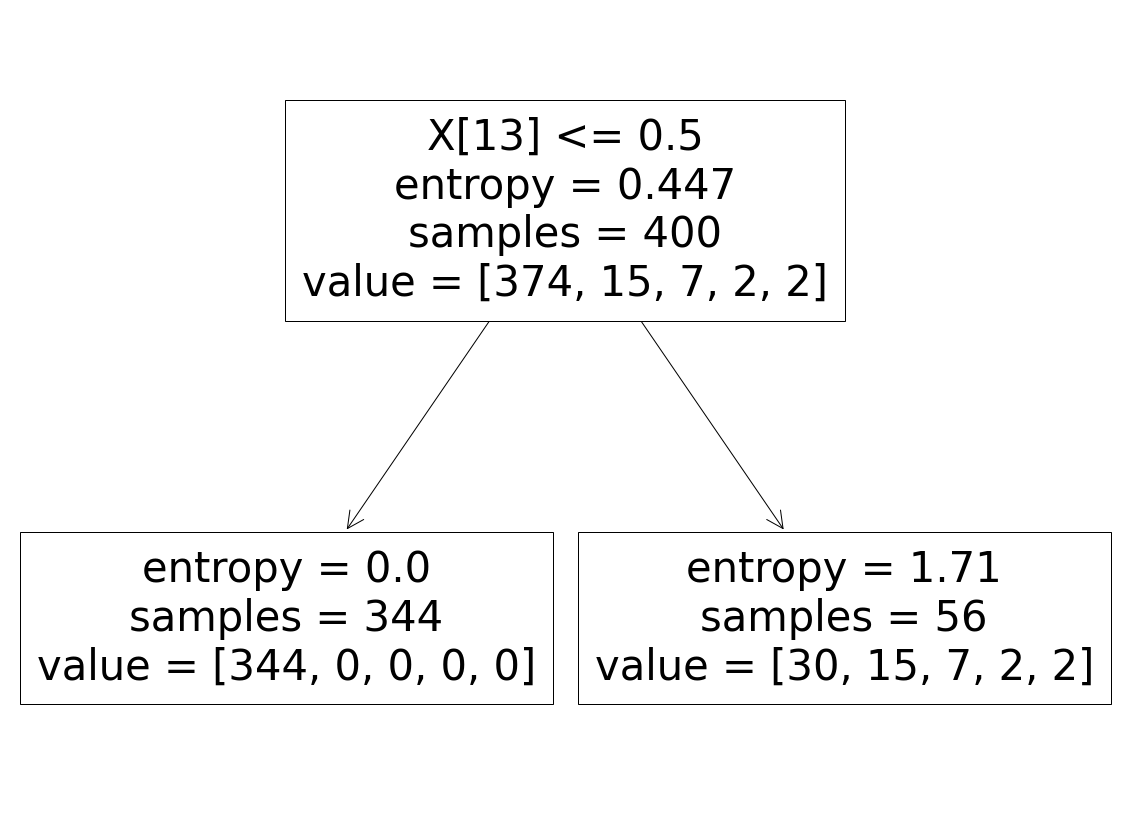

In [135]:
#CART Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50)
DecisionTree.fit(Xd,Yd)
plt.figure(figsize=(20,15))
plot_tree(DecisionTree)

In [136]:
DecisionTree.fit(Xd_train, Yd_train)
Ypred=DecisionTree.predict(Xd_test)
missclf_rate= 1-metrics.accuracy_score(Yd_test, Ypred)
missclf_rate

0.0625

In [137]:
#random forest model
ntrees=[]
miss_clf_rate=[]
for i in range (1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(Xd_train, Yd_train)
    Ypred_dt=rf.predict(Xd_test)
    ntrees.append(i)
    rate=1-metrics.accuracy_score(Yd_test, Ypred)
    miss_clf_rate.append(rate)

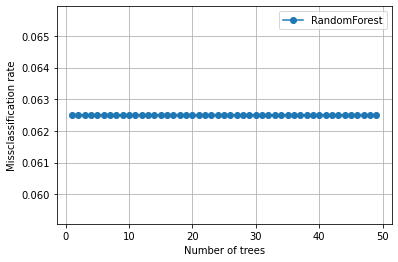

In [138]:
plt.figure()#(figsize=(20,10))
plt.plot(ntrees, miss_clf_rate, '-o', label='RandomForest')
plt.xlabel('Number of trees')
plt.ylabel('Missclassification rate')
plt.legend()
plt.grid()

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(Xd,Yd)
rf_ypred= rf_clf.predict(Xd_test)
rf_auc=roc_auc_score(Yd_test, rf_ypred)
rf_auc

ValueError: multi_class must be in ('ovo', 'ovr')

In [140]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.2, random_state=42)

In [141]:
dt1_clf = DecisionTreeClassifier()
dt1_clf=dt1_clf.fit(Xd_train, Yd_train)
dt_ypred= dt1_clf.predict(Xd_test)
dt_auc=roc_auc_score(Yd_test, dt_ypred)
dt_auc

ValueError: multi_class must be in ('ovo', 'ovr')

In [142]:
#Misclassification rate plot DecisionTree and RandomForest
dt_auc=[]
rf_auc=[]
rate_dt_auc=[]
rate_rf_auc=[]
for i in range (1,100):
    dt = DecisionTreeClassifier(max_depth=i)
    rf = RandomForestClassifier(max_depth=i)
    dt.fit(Xd_train, Yd_train)
    rf.fit(Xd_train, Yd_train)
    
    ypred_dt = dt.predict(Xd_test)
    rate_dt=1-metrics.accuracy_score(Yd_test, ypred_dt)
    rate_dt
    auc_dt=roc_auc_score(Yd_test, ypred_dt)
    dt_auc.append(auc_dt)
    rate_dt_auc.append(rate_dt)
    
    
    ypred_rf = rf.predict(Xd_test)
    rate_rf=1-metrics.accuracy_score(Yd_test, ypred_rf)
    auc_rf=roc_auc_score(Yd_test, ypred_rf)
    rf_auc.append(auc_rf)
    rate_rf_auc.append(rate_rf)

ValueError: multi_class must be in ('ovo', 'ovr')

ValueError: x and y must be the same size

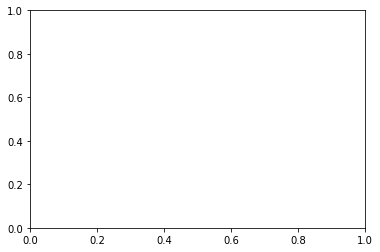

In [143]:
fig=plt.figure()
ax1=fig.add_subplot()
#ax1.scatter(range(1,100), dt_auc, s=12, c='g', marker="s", label='Decision Tree')
#ax1.scatter(range(1,100), rf_auc, s=12, c='b', marker="s", label='Random Forest')
ax1.scatter(range(1,100), rate_dt_auc, s=12, c='g', marker="s", label='Decision Tree')
ax1.scatter(range(1,100), rate_rf_auc, s=12, c='b', marker="s", label='Random Forest')
plt.title('Misclassication error rate vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Misclassication error rate')

>1, train: 0.956, test: 0.963
>2, train: 0.978, test: 0.975
>3, train: 0.991, test: 0.975
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

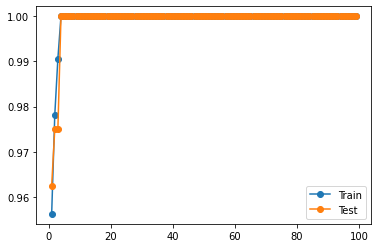

In [144]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset

# split into train test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.2, random_state=42)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 100)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xd_train, Yd_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xd_train)
	train_acc = accuracy_score(Yd_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xd_test)
	test_acc = accuracy_score(Yd_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

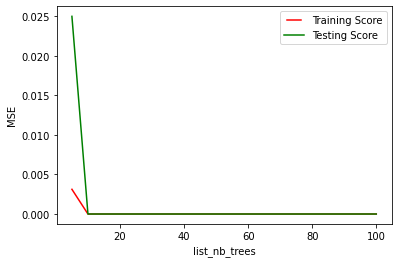

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(Xd_train, Yd_train)

    train_results.append(mean_squared_error(Yd_train, rf.predict(Xd_train)))
    test_results.append(mean_squared_error(Yd_test, rf.predict(Xd_test)))

line1, = plt.plot(trees, train_results, color="r", label="Training Score")
line2, = plt.plot(trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('list_nb_trees')
plt.show()

In [146]:
#SVM Model
# fit the model
from sklearn.svm import OneClassSVM
import numpy as np
import pylab as pl
import matplotlib.font_manager
from sklearn import svm
rate_svm=[]
rate_rf_auc=[]
for i in range (1,100):
    clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(Xd_train,Yd_train)
    y_pred_train = clf.predict(Xd_train)
    y_pred_test = clf.predict(Xd_test)
    #y_pred_outliers = clf.predict(X_outliers)
    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    SVM_rate = 1-metrics.accuracy_score(Yd_test, y_pred_test)
    SVM_rate
    rate_svm.append(SVM_rate)
  #  pyplot.plot(rate_svm, gamma, '-o', label='Train')
#n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [147]:
SVM_rate

0.9875

# Test

## No missing values

In [148]:
test = pd.read_csv('input/Test.csv')
test.dropna(inplace = True)
truth = test['Outcome']
test.drop('Outcome', axis = 1, inplace = True)
predictions = pipeline.predict(test)
conf = (confusion_matrix(truth,predictions))
acc = (accuracy_score(truth,predictions))
auc = (roc_auc_score(truth,predictions))
sns.heatmap(conf, annot=True, xticklabels=xlabel, yticklabels=ylabel)  
print("accuracy", acc)
print("AUC", auc)
#plt.savefig('test_conf.eps', format='eps', dpi=1000)

ValueError: X has 8 features, but SimpleImputer is expecting 17 features as input.

Eureka, this is really good. 

## Missing values

In [149]:
test = pd.read_csv('input/Test.csv')
truth = test['Outcome']
test.drop('Outcome', axis = 1, inplace = True)
predictions = pipeline.predict(test)
conf = (confusion_matrix(truth,predictions))
acc = (accuracy_score(truth,predictions))
auc = (roc_auc_score(truth,predictions))
sns.heatmap(conf, annot=True, xticklabels=xlabel, yticklabels=ylabel)  
print("accuracy", acc)
print("AUC", auc)

ValueError: X has 8 features, but SimpleImputer is expecting 17 features as input.

Not as good, but still good.